In [9]:
from random import uniform
import math
import matplotlib.pyplot as plt

In [4]:
All_Lost = 0
BasicOptOfferPrice = 35
BasicOptOfferVol = 50
BasicStore = 80
InitAccount = 10000
InitTaxes = 0
Max_Demand = 30
MeanDPrice = 100
OptOfferAcceptDecision = 1
OptOfferBaseVolume = 40
RentRate = 200
Ret_Price = 100
ShopStore = 30
STOP_SELL = 0
TaxesRate = 30
TransferDecision = 1
TransferRate = 150
TransferVol = 30
dt = 1
CurTime = 0
Time = 100

In [7]:
Account = InitAccount
Taxes = InitTaxes

BasicPriceRnd = BasicOptOfferVol * (uniform(.7, 1.3))
AddPriceByTime = BasicOptOfferPrice * 0.03 * CurTime + BasicOptOfferPrice * 0.01 * CurTime * uniform(0, 1)
OfferOnePrice = AddPriceByTime + BasicPriceRnd
RndOfferVolume = round(OptOfferBaseVolume * uniform(0.75, 1.25))
OfferFullPrice = OfferOnePrice * RndOfferVolume
OfferAcceptPossibility = 1 if Account >= OfferFullPrice else 0
SmallOptIncom = OfferAcceptPossibility * OptOfferAcceptDecision * RndOfferVolume

TransferActualVolue = min(BasicStore, TransferVol * TransferDecision) if Account >= TransferRate else 0
GoodsTransfer = math.floor(TransferActualVolue)
Lost = ShopStore + GoodsTransfer - 100 if ShopStore + GoodsTransfer > 100 else 0

Demand = round(Max_Demand * (1 - 1 / (1 + math.exp(-0.05 * (Ret_Price - MeanDPrice)))))
RND_Demand = round(Demand * uniform(0.7, 1.2))
SoldRet = (1 - STOP_SELL) * min(RND_Demand, ShopStore)
Selling = SoldRet
Income = Ret_Price * SoldRet
TaxesCalc = Income * TaxesRate / 100
TaxesPayment = Taxes if CurTime % 30 == 0 else 0
DailySpending = min(RentRate, Account)
TransSpend = TransferRate if TransferActualVolue > 0 else 0
VAT = TaxesPayment

print("-" * 50)
print("Закупка товара")
print("-" * 50)
print(f"Account = {Account}")
print(f"RndOfferVolume = {RndOfferVolume}")
print(f"OfferFullPrice = {OfferFullPrice}")
print(f"OfferOnePrice = {OfferOnePrice}")
print(f"OptOfferAcceptDecision = {bool(OptOfferAcceptDecision)}")
print("-" * 50)
print("Склады")
print("-" * 50)
print(f"ShopStore = {ShopStore}")
print(f"BasicStore = {BasicStore}")
print(f"TransferVolume = {TransferVol}")
print(f"TransferDecision = {bool(TransferDecision)}")
print("-" * 50)
print("Торговля")
print("-" * 50)
print(f"RND_Demand = {RND_Demand}")
print(f"Ret_Price = {Ret_Price}")
print(f"STOP_SELL = {bool(STOP_SELL)}")
print()

--------------------------------------------------
Закупка товара
--------------------------------------------------
Account = 10000
RndOfferVolume = 42
OfferFullPrice = 1898.2337755191738
OfferOnePrice = 45.19604227426604
OptOfferAcceptDecision = True
--------------------------------------------------
Склады
--------------------------------------------------
ShopStore = 30
BasicStore = 80
TransferVolume = 30
TransferDecision = True
--------------------------------------------------
Торговля
--------------------------------------------------
RND_Demand = 15
Ret_Price = 100
STOP_SELL = False



In [8]:
change_flag = True if input("Изменять параметры при моделировании? Y/N").lower() == 'y' else False

account_list = [Account]
taxes_list = [Taxes]
shop_store_list = [ShopStore]
basic_store_list = [BasicStore]

for CurTime in range(1, Time + 1):
    if change_flag:
        TransferVol = float(input(f"Задайте TransferVolume"))
        Ret_Price = float(input(f"Задайте Ret_Price"))
        STOP_SELL = 1 if input(f"Задайте STOP_SELL (y/n)").lower() == 'y' else 0
        OptOfferAcceptDecision = 1 if input(f"Задайте OptOfferAcceptDecision (y/n)").lower() == 'y' else 0
        TransferDecision = 1 if input(f"Задайте TransferDecision (y/n)").lower() == 'y' else 0
    Account += dt * (Income - DailySpending - TransSpend - VAT)
    BasicStore += dt * (SmallOptIncom - GoodsTransfer)
    ShopStore += dt * (GoodsTransfer - Selling - Lost)
    Taxes += dt * (TaxesCalc - TaxesPayment)
    All_Lost += dt * Lost

    BasicPriceRnd = BasicOptOfferVol * (uniform(.7, 1.3))
    AddPriceByTime = BasicOptOfferPrice * 0.03 * CurTime + BasicOptOfferPrice * 0.01 * CurTime * uniform(0, 1)
    OfferOnePrice = AddPriceByTime + BasicPriceRnd
    RndOfferVolume = round(OptOfferBaseVolume * uniform(0.75, 1.25))
    OfferFullPrice = OfferOnePrice * RndOfferVolume
    OfferAcceptPossibility = 1 if Account >= OfferFullPrice else 0
    SmallOptIncom = OfferAcceptPossibility * OptOfferAcceptDecision * RndOfferVolume

    TransferActualVolue = min(BasicStore, TransferVol * TransferDecision) if Account >= TransferRate else 0
    GoodsTransfer = math.floor(TransferActualVolue)
    Lost = ShopStore + GoodsTransfer - 100 if ShopStore + GoodsTransfer > 100 else 0

    Demand = round(Max_Demand * (1 - 1 / (1 + math.exp(-0.05 * (Ret_Price - MeanDPrice)))))
    RND_Demand = round(Demand * uniform(0.7, 1.2))
    SoldRet = (1 - STOP_SELL) * min(RND_Demand, ShopStore)
    Selling = SoldRet
    Income = Ret_Price * SoldRet
    TaxesCalc = (Income-DailySpending-TransSpend)*TaxesRate/100
    TaxesPayment = Taxes if CurTime % 30 == 0 else 0
    DailySpending = min(RentRate, Account)
    TransSpend = TransferRate if TransferActualVolue > 0 else 0
    VAT = TaxesPayment
    account_list.append(Account)
    taxes_list.append(Taxes)
    shop_store_list.append(ShopStore)
    basic_store_list.append(BasicStore)
    print(f"-------День {CurTime}-------")
    print("Закупка товара")
    print("-" * 50)
    print(f"Account = {Account}")
    print(f"RndOfferVolume = {RndOfferVolume}")
    print(f"OfferFullPrice = {OfferFullPrice}")
    print(f"OfferOnePrice = {OfferOnePrice}")
    print(f"OptOfferAcceptDecision = {bool(OptOfferAcceptDecision)}")
    print("-" * 50)
    print("Склады")
    print("-" * 50)
    print(f"ShopStore = {ShopStore}")
    print(f"BasicStore = {BasicStore}")
    print(f"TransferVolume = {TransferVol}")
    print(f"TransferDecision = {bool(TransferDecision)}")
    print("-" * 50)
    print("Торговля")
    print("-" * 50)
    print(f"RND_Demand = {RND_Demand}")
    print(f"Ret_Price = {Ret_Price}")
    print(f"STOP_SELL = {bool(STOP_SELL)}")
    print()

Изменять параметры при моделировании? Y/Nn
-------День 1-------
Закупка товара
--------------------------------------------------
Account = 11150
RndOfferVolume = 32
OfferFullPrice = 1635.569128801983
OfferOnePrice = 51.11153527506197
OptOfferAcceptDecision = True
--------------------------------------------------
Склады
--------------------------------------------------
ShopStore = 45
BasicStore = 92
TransferVolume = 30
TransferDecision = True
--------------------------------------------------
Торговля
--------------------------------------------------
RND_Demand = 14
Ret_Price = 100
STOP_SELL = False

-------День 2-------
Закупка товара
--------------------------------------------------
Account = 12200
RndOfferVolume = 46
OfferFullPrice = 1975.4844907185338
OfferOnePrice = 42.9453150156203
OptOfferAcceptDecision = True
--------------------------------------------------
Склады
--------------------------------------------------
ShopStore = 61
BasicStore = 94
TransferVolume = 30
Transfe

Text(0.5, 1.0, 'Состояние счета')

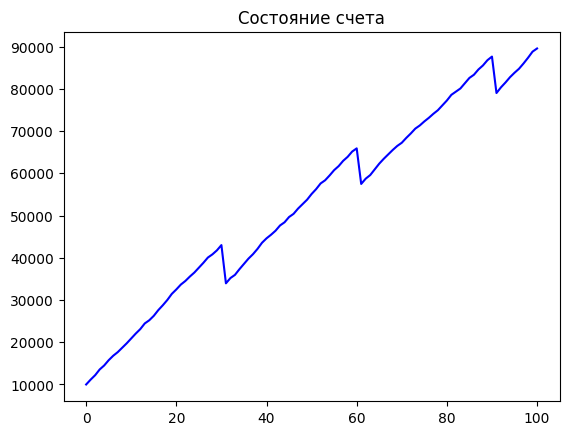

In [13]:
plt.plot(account_list, label='Состояние счета', color='blue')
plt.title('Состояние счета')

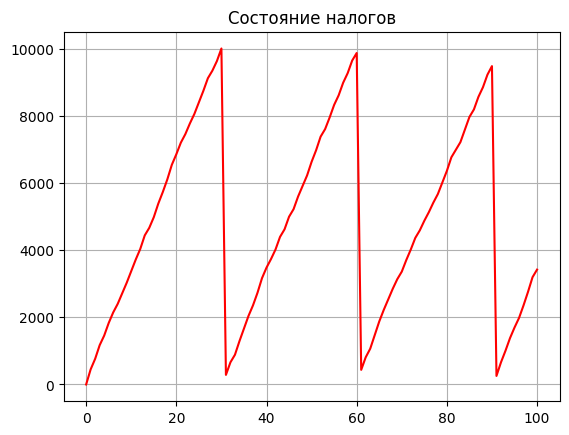

In [12]:
plt.plot(taxes_list, label='Состояние налогов', color='red')
plt.title('Состояние налогов')
plt.grid(True)

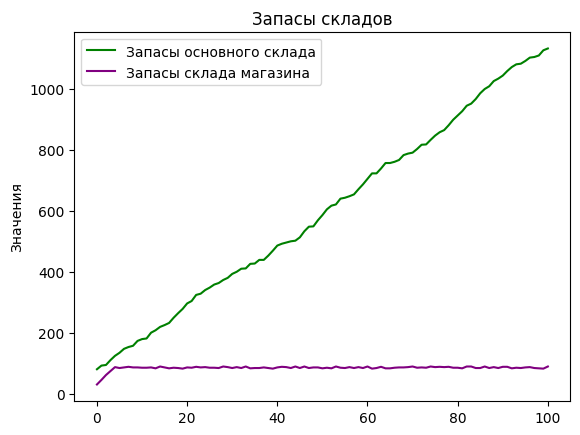

In [15]:
plt.plot(basic_store_list, label='Запасы основного склада', color='green')
plt.plot(shop_store_list, label='Запасы склада магазина', color='purple')
plt.title('Запасы складов')
plt.ylabel('Значения')
plt.legend()